In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns

import pylab as plot
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

In [3]:
# 視覺化缺值工具
import missingno as msno

In [34]:
# using pip in jupyer notebook by using :
# !{sys.executable} -m pip install package_name
import sys

In [4]:
# 讀入資料並印出基本資料

In [5]:
data = pd.read_csv('./data/train.csv')

In [6]:
data.shape

(891, 12)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# 此處可以看到 Age存在很明顯的缺值, 我們用另一種角度視覺把缺值視覺化

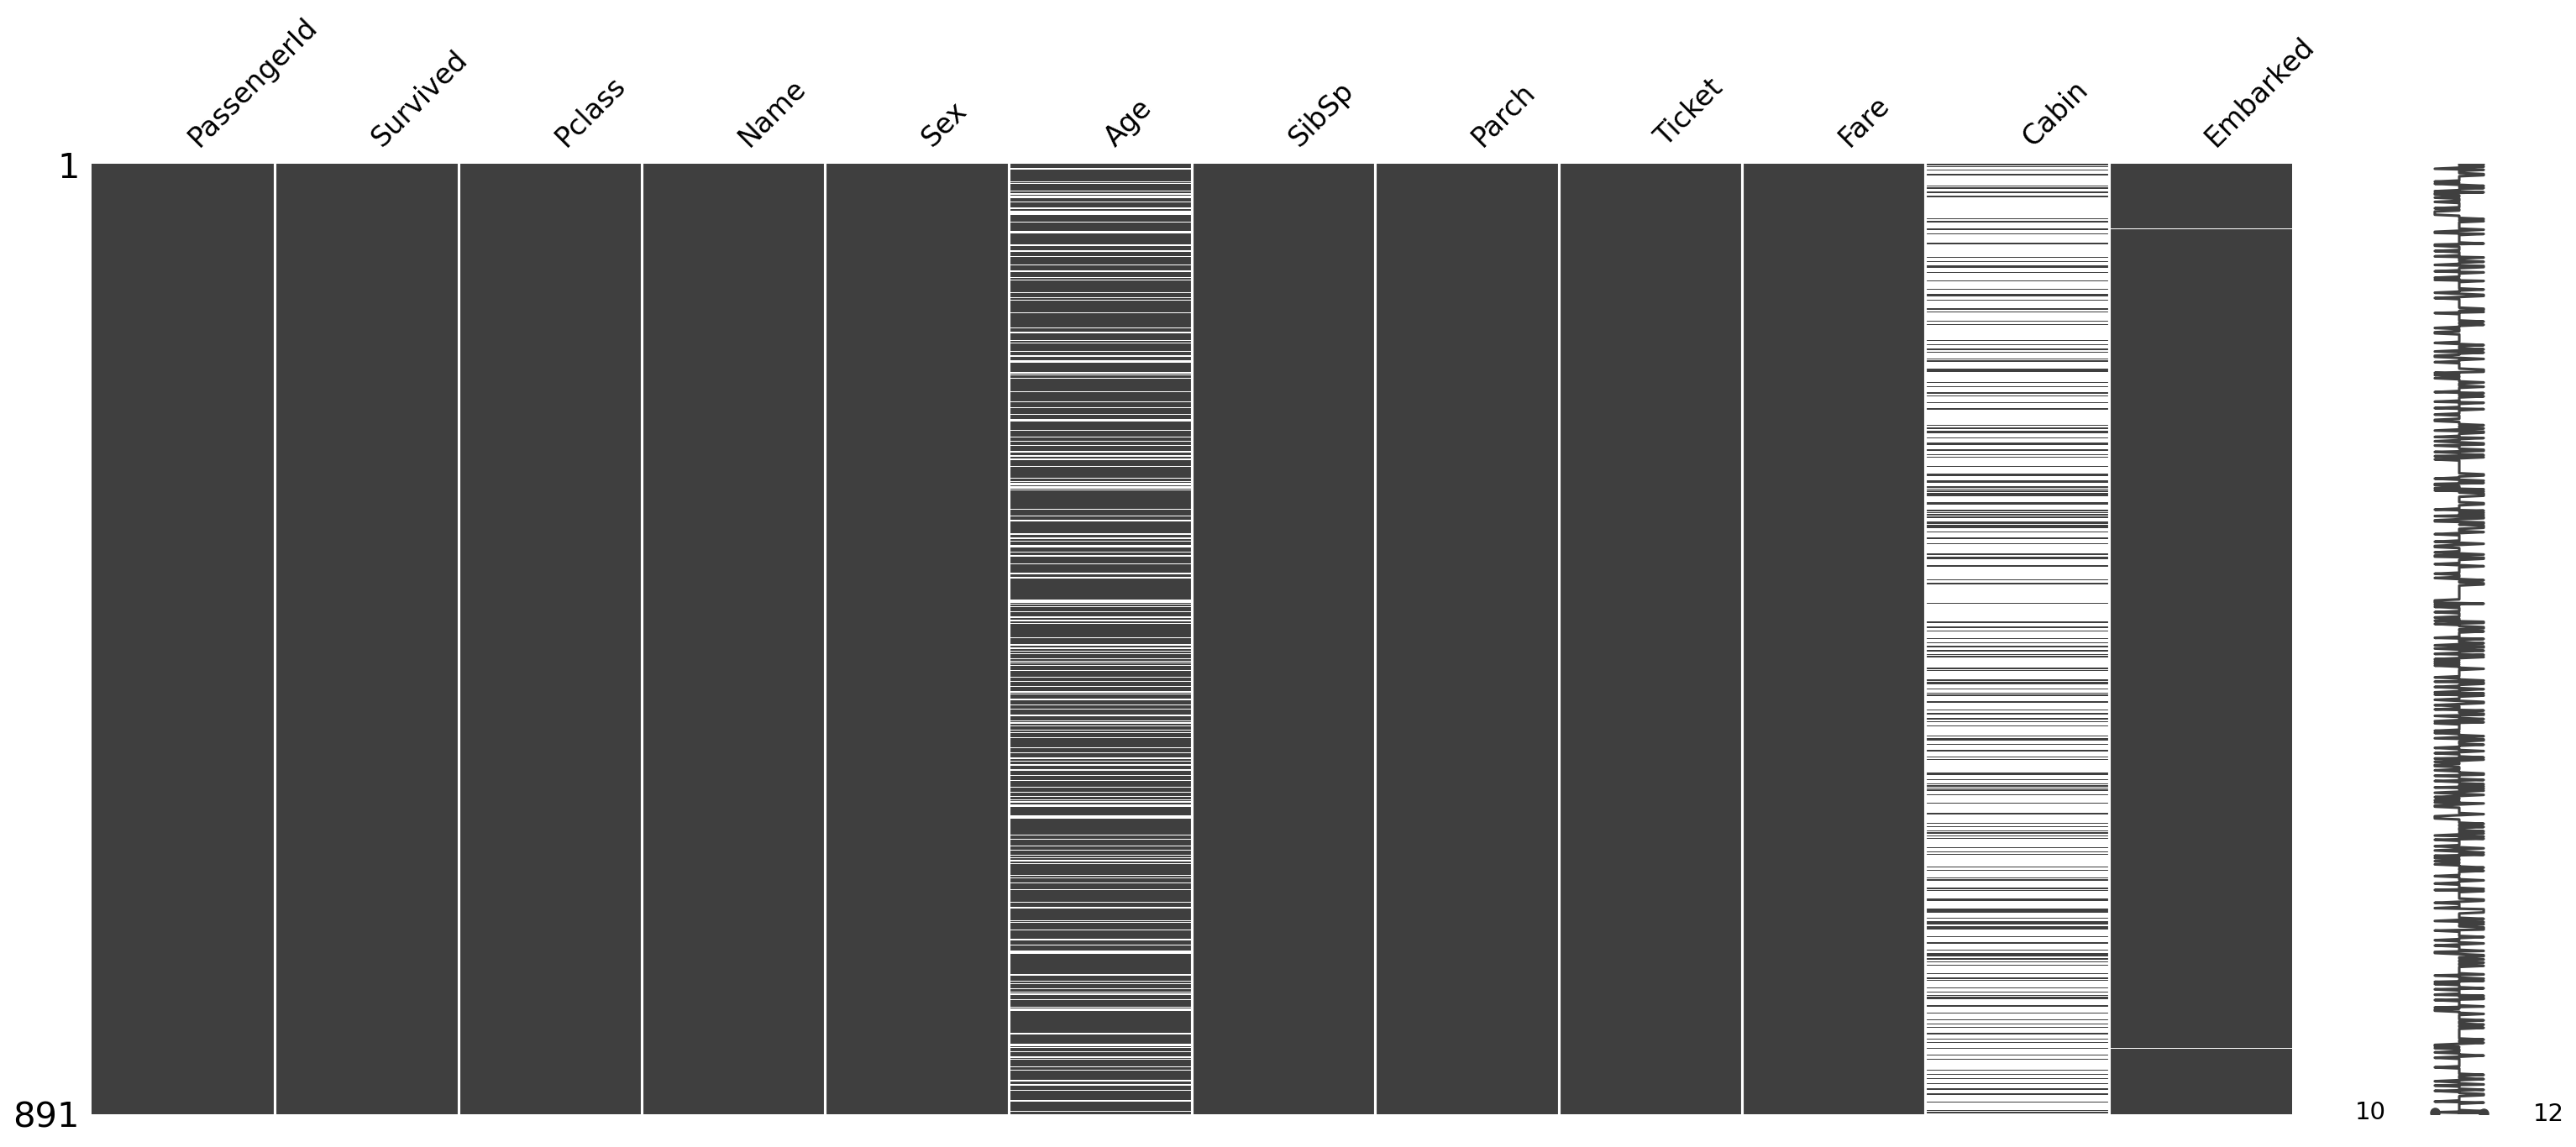

In [10]:
msno.matrix(data)

In [11]:
# 從這張圖我們可以看見 describe count雖然能看見一定的缺值 但是他其實沒有很謹慎
# 鐵達尼號這個資料集一共有三個特徵缺值，分別是船艙號碼最為嚴重，在來是年齡以及、在船上的可能所在位置
# 還是建議用info()比較保險

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# 經過info詳細計算
# 年齡缺少 177個樣本
# 在船上的可能所在位置 缺少2個樣本
# 船艙號碼缺少 687個樣本

In [14]:
# 雖然我很想馬上補齊缺值，但在不了解特徵本身與之間的關係以前，貿然補値是不智的行為

In [15]:
# 一開始觀察的特徵希望不要太複雜，所以像是乘客ID，文字等等先不看
# 剩下的就是 Embarked, Pclass, Parch, SibSp跟Sex這幾個特徵 

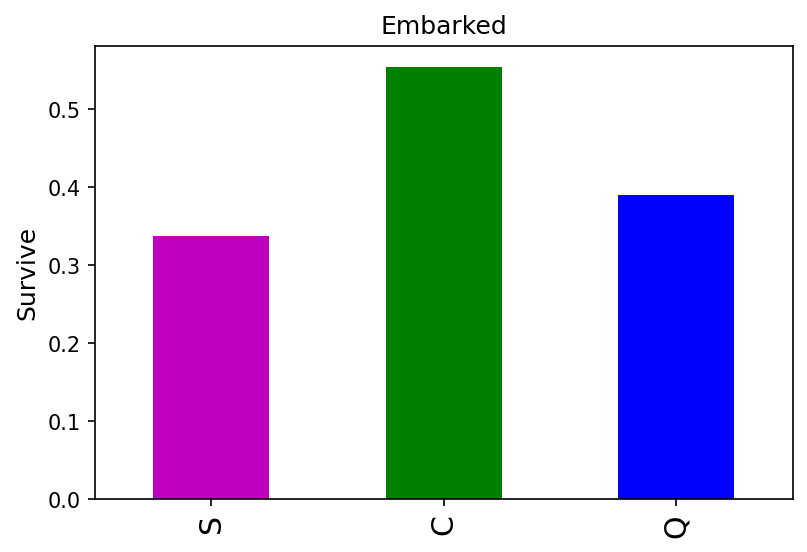

In [16]:
# Embarked(登船港口) 與存活率
embarked_s = data[data['Embarked']=='S']['Survived']
embarked_c = data[data['Embarked']=='C']['Survived']
embarked_q = data[data['Embarked']=='Q']['Survived']
embarked_survived = pd.DataFrame([
    embarked_s.value_counts([0, 1])[1], 
    embarked_c.value_counts([0, 1])[1], 
    embarked_q.value_counts([0, 1])[1]
])
embarked_survived.index = ['S', 'C', 'Q']
embarked_survived.plot(
    kind='bar',
    color = [['m', 'g', 'b']],
    figsize=(6, 4)
)
plot.title('Embarked')
plot.ylabel('Survive')
plot.legend().remove()

In [17]:
# Pclass(船艙等級) 與存活率

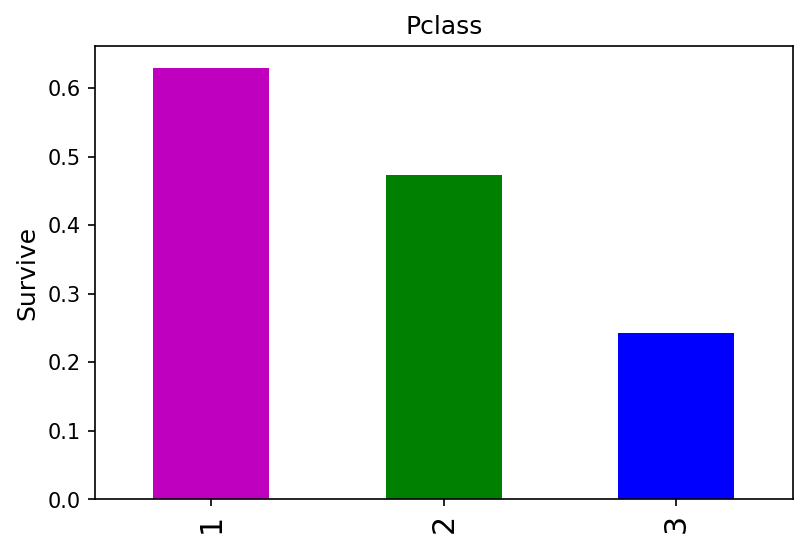

In [18]:
pclass_1 = data[data['Pclass']==1]['Survived']
pclass_2 = data[data['Pclass']==2]['Survived']
pclass_3 = data[data['Pclass']==3]['Survived']
pclass_survived = pd.DataFrame([
    pclass_1.value_counts([0, 1])[1],
    pclass_2.value_counts([0, 1])[1],
    pclass_3.value_counts([0, 1])[1]
])
pclass_survived.index = [1, 2, 3]
pclass_survived.plot(
    kind='bar',
    color = [['m', 'g', 'b']],
    figsize=(6, 4)
)
plot.title('Pclass')
plot.ylabel('Survive')
plot.legend().remove()

In [19]:
# Parch (一起旅行的父母的孩子數量)與存活率

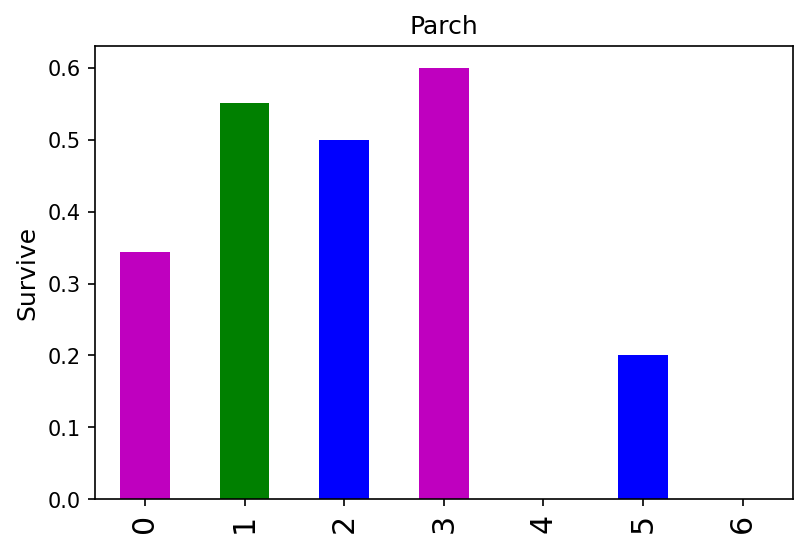

In [20]:
valueset = data['Parch'].unique()
temp = []
for v in valueset:
    temp.append(data[data['Parch']==v]['Survived'].value_counts([0, 1]).reindex([0, 1], fill_value=0)[1])
parch = pd.DataFrame(temp)
parch.index = valueset
parch.sort_index(inplace=True)
parch.plot(
    kind='bar',
    color = [['m', 'g', 'b']],
    figsize=(6, 4)
)
plot.title('Parch')
plot.ylabel('Survive')
plot.legend().remove()

In [21]:
# SibSp (一起登船​兄弟姊妹的數量) 與存活率

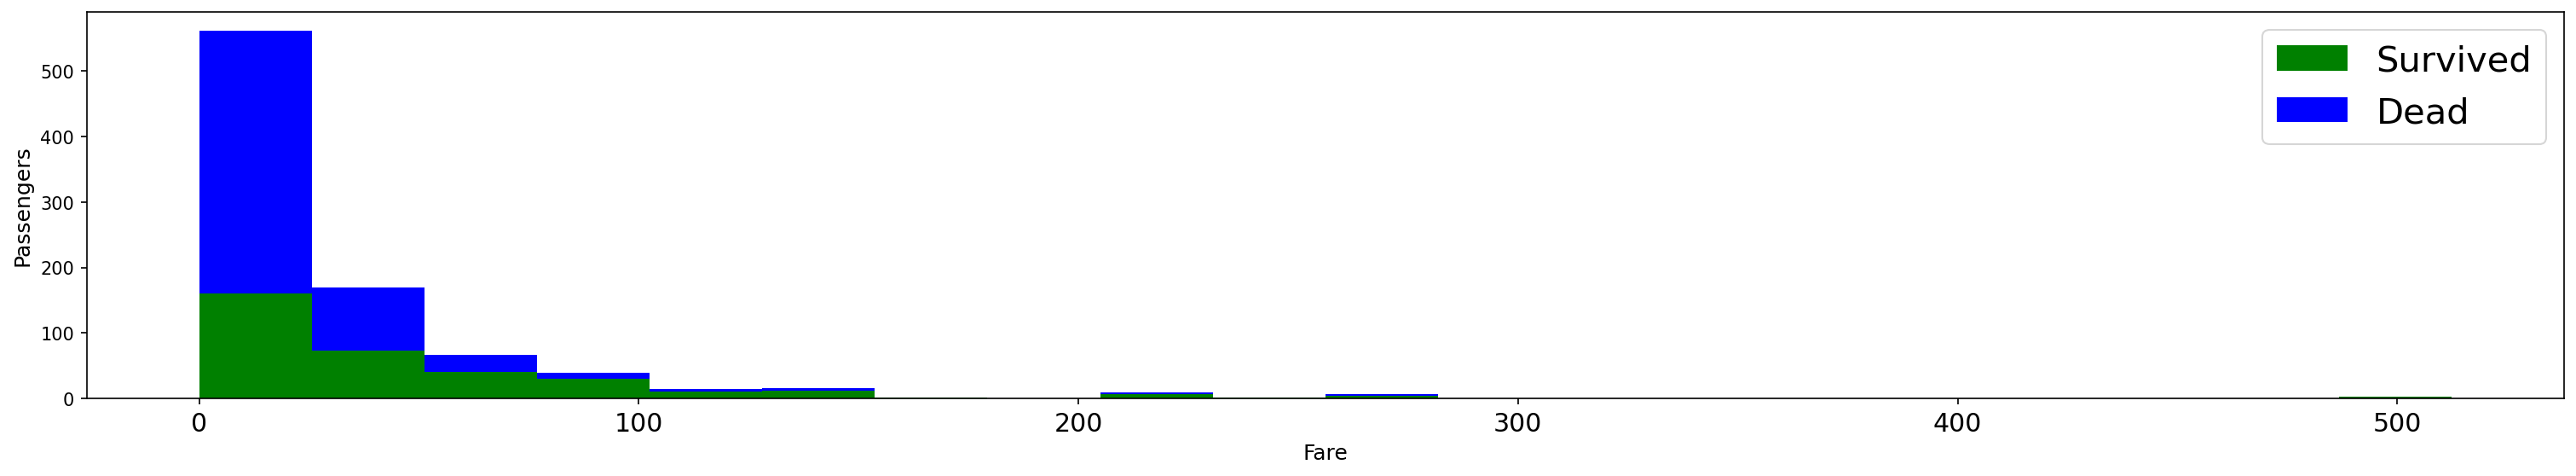

In [22]:
fig = plt.figure(figsize=(25, 4))
plt.hist(
    [data[data['Survived']==1]['Fare'], data[data['Survived']==0]['Fare']],
    stacked=True,
    color=['g', 'b'],
    bins=20,
    label=['Survived', 'Dead']
)
plt.xlabel('Fare')
plt.ylabel('Passengers')
plt.legend()

In [23]:
# Sex(性別) 與存活率

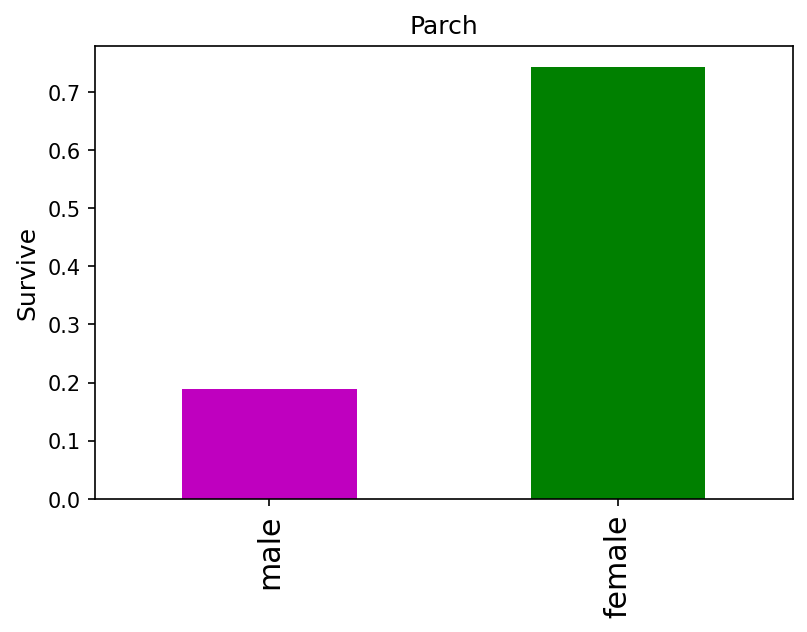

In [24]:
male = data[data['Sex']=='male']['Survived']
female = data[data['Sex']=='female']['Survived']
sex = pd.DataFrame([
    male.value_counts([0, 1])[1],
    female.value_counts([0, 1])[1]
])
sex.index = ['male', 'female']
sex.plot(
    kind='bar',
    color = [['m', 'g', 'b']],
    figsize=(6, 4)
)
plot.title('Parch')
plot.ylabel('Survive')
plot.legend().remove()

In [25]:
# Sex(年齡) 與存活率

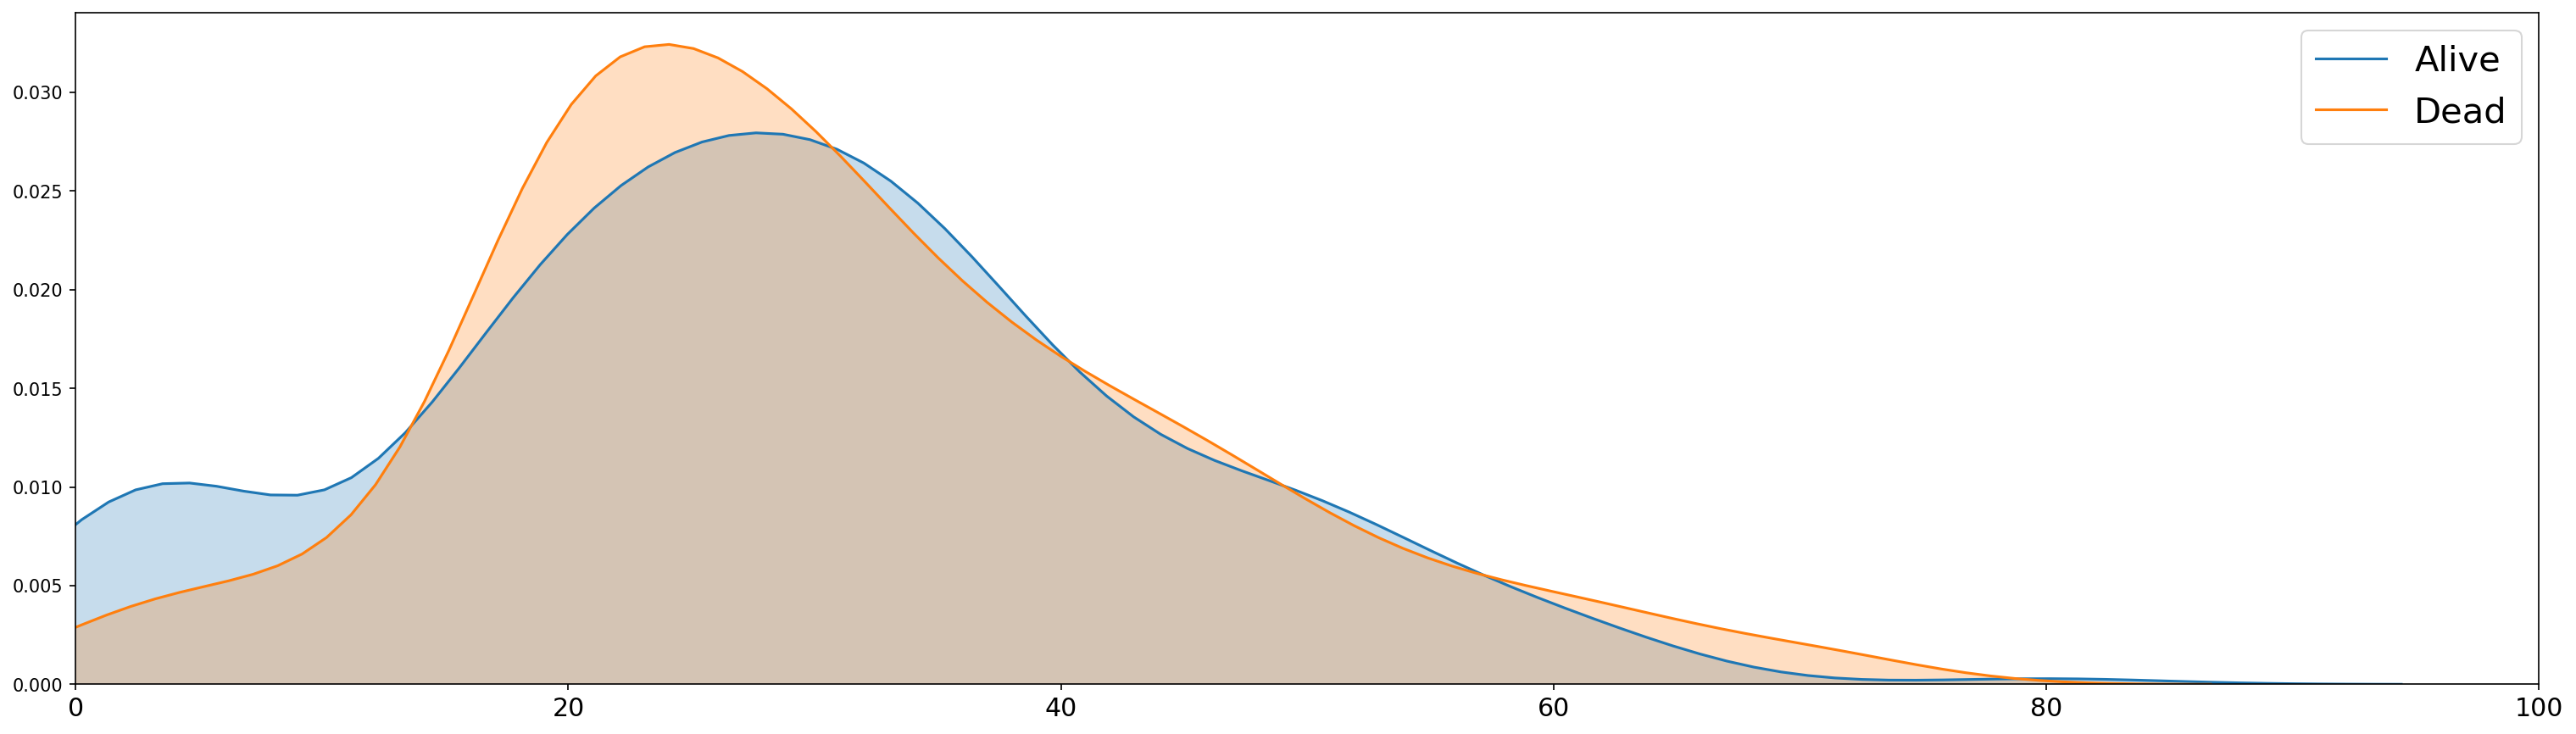

In [26]:
age = data[data['Age'].notnull()]
age = age[['Age', 'Survived']]
age = age.reset_index()
age_survive = age[age['Survived']==1]['Age']
age_dead = age[age['Survived']==0]['Age']
sns.kdeplot(age_survive, shade=True, legend=False).set(xlim=(0, 100))
sns.kdeplot(age_dead, shade=True, legend=False).set(xlim=(0, 100))
plt.legend(labels=['Alive', 'Dead'])

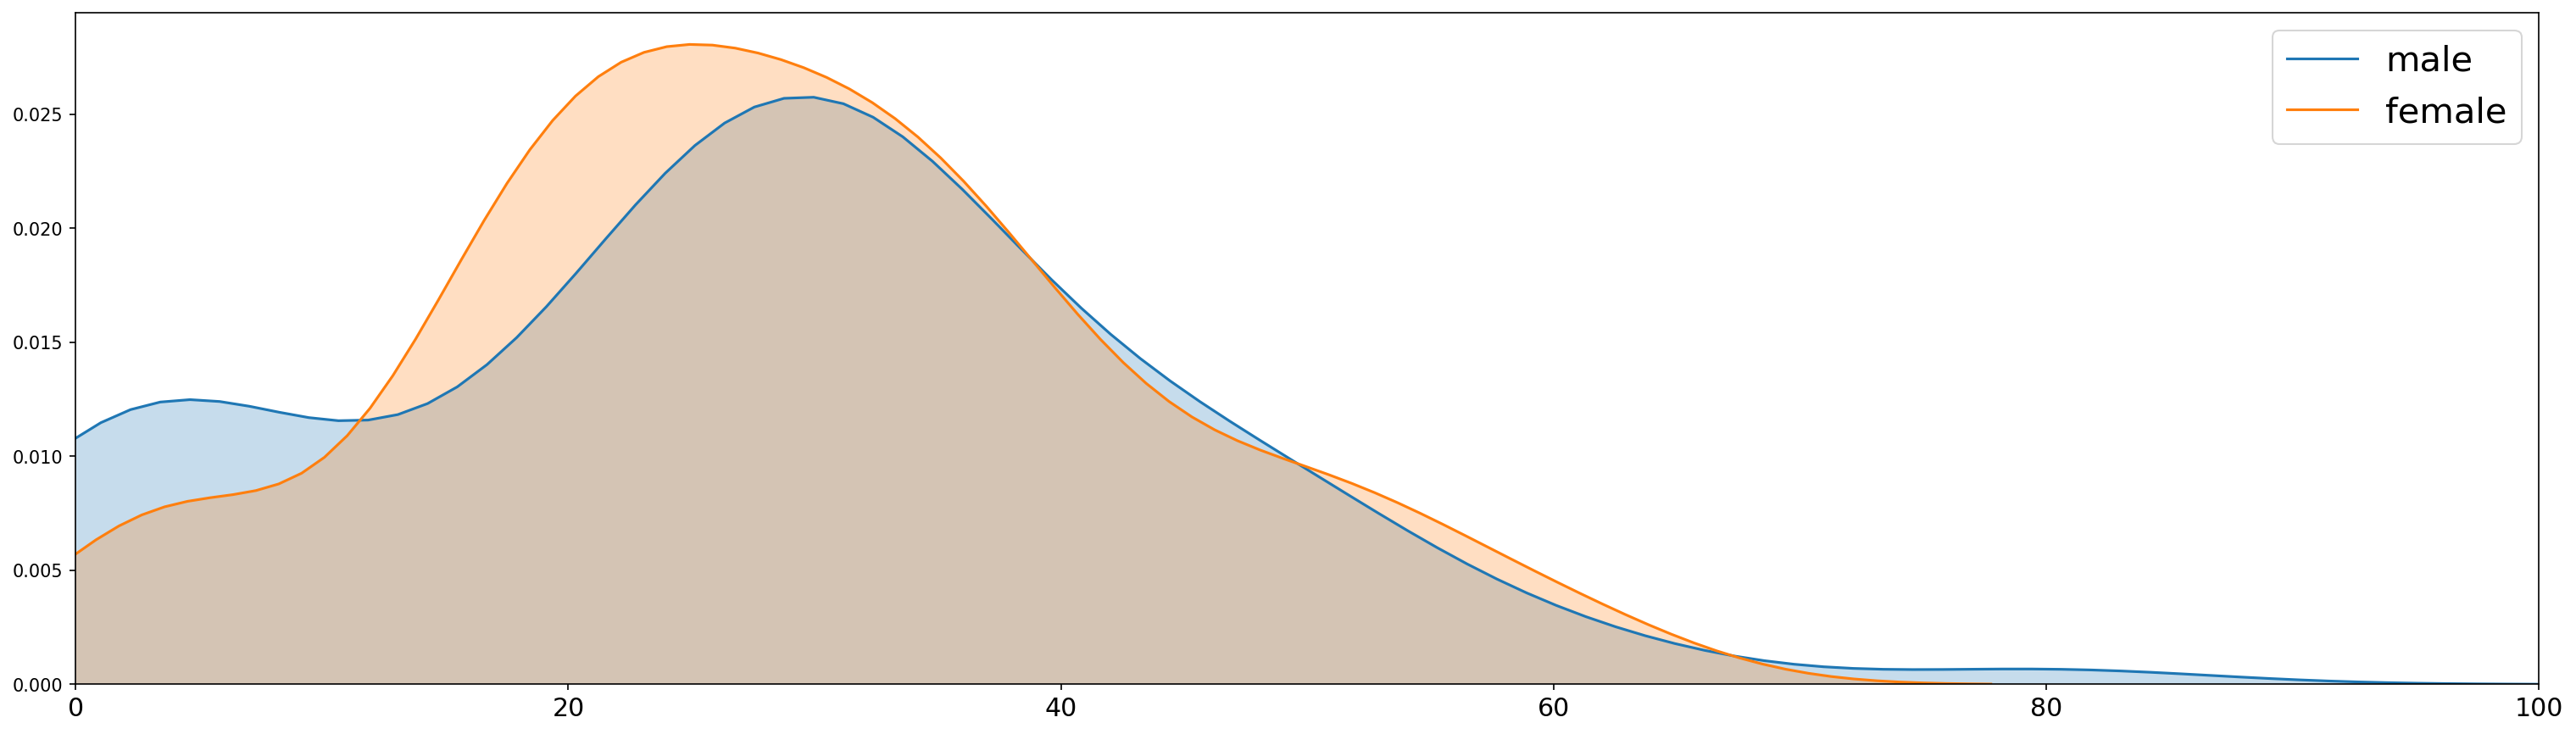

In [27]:
survived_age = data[data['Survived']==1][['Sex', 'Age']]
survived_male_age = survived_age[(survived_age['Sex']=='male') & (survived_age['Age'].notnull())].reset_index()['Age']
survived_female_age = survived_age[(survived_age['Sex']=='female') & (survived_age['Age'].notnull())].reset_index()['Age']

sns.kdeplot(survived_male_age, shade=True, legend=False).set(xlim=(0, 100))
sns.kdeplot(survived_female_age, shade=True, legend=False).set(xlim=(0, 100))
plt.legend(labels=['male', 'female'])

In [28]:
# 將性別、年齡與生存特徵連結

([<matplotlib.axis.YTick at 0x1bf89c18e10>,
 <a list of 10 Text major ticklabel objects>)

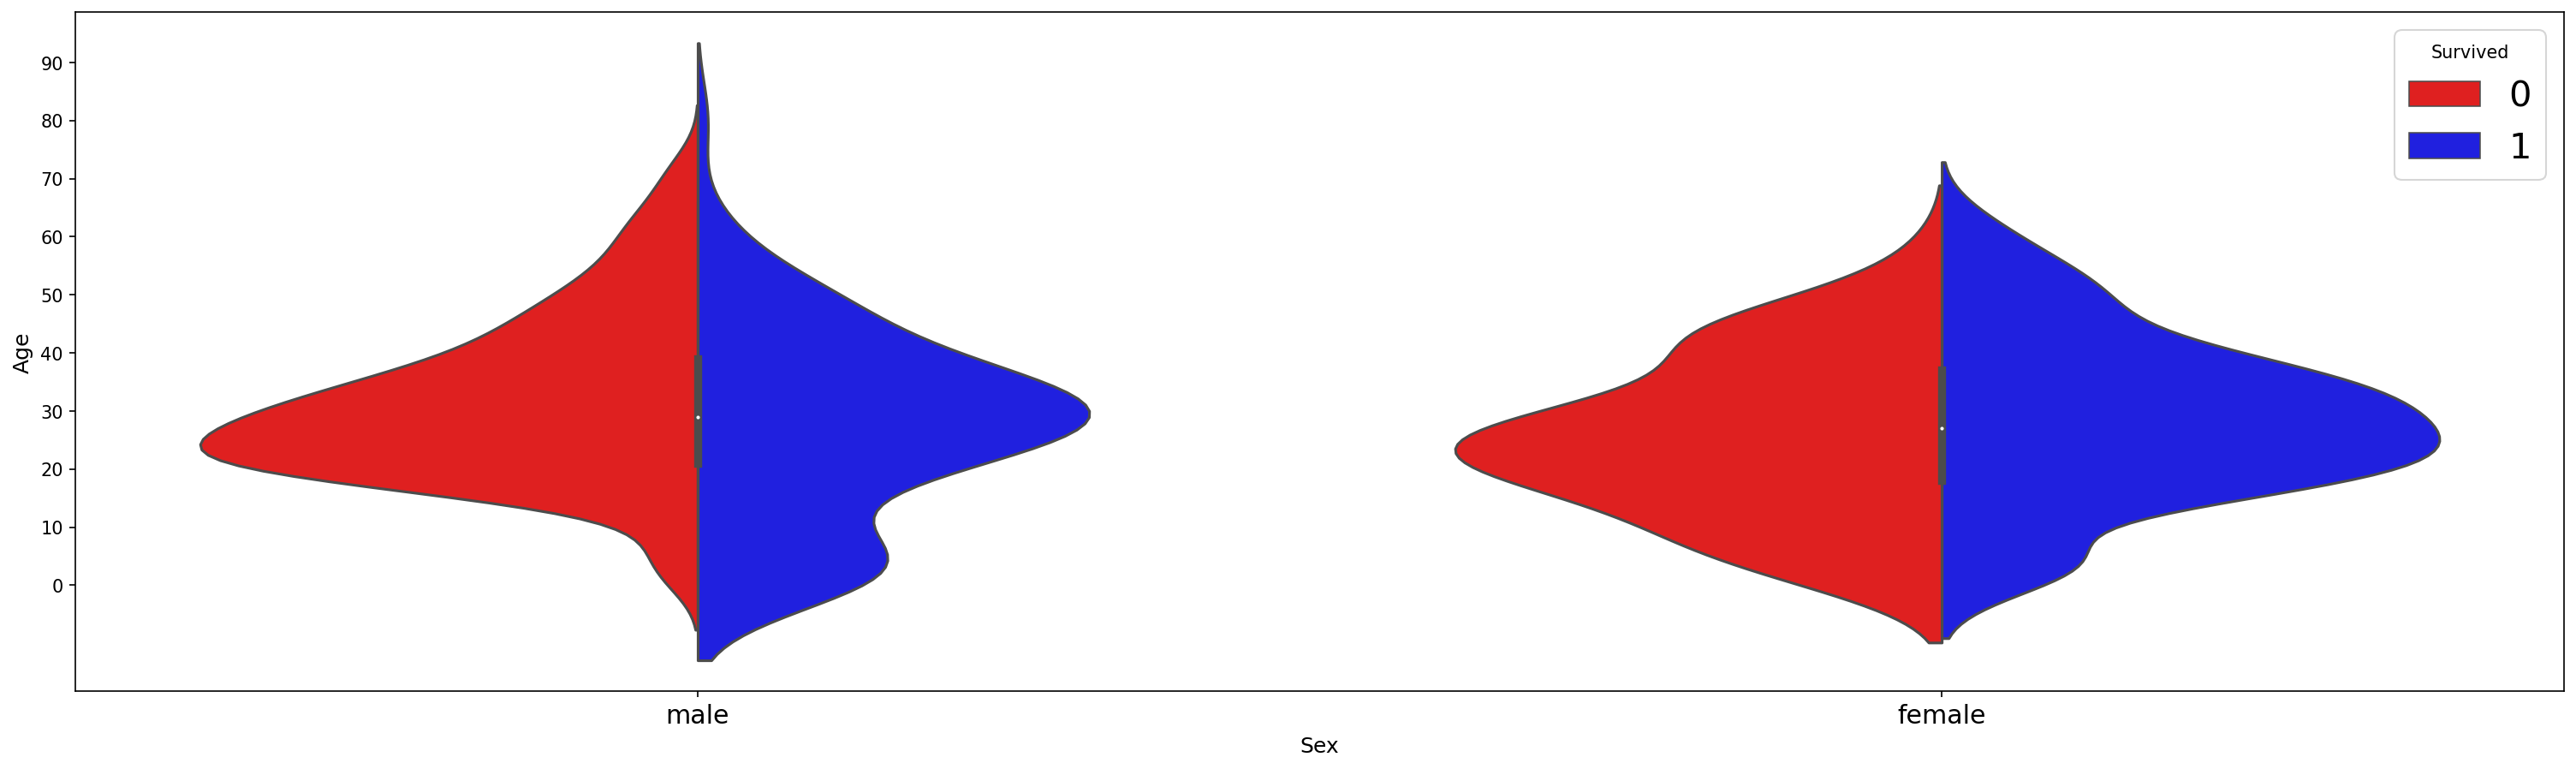

In [29]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(
    x = 'Sex', y='Age',
    hue='Survived', data=data,
    split=True,
    palette={0: 'r', 1: 'b'}
)
plt.yticks(range(0, 100, 10))

Text(0, 0.5, 'Fare')

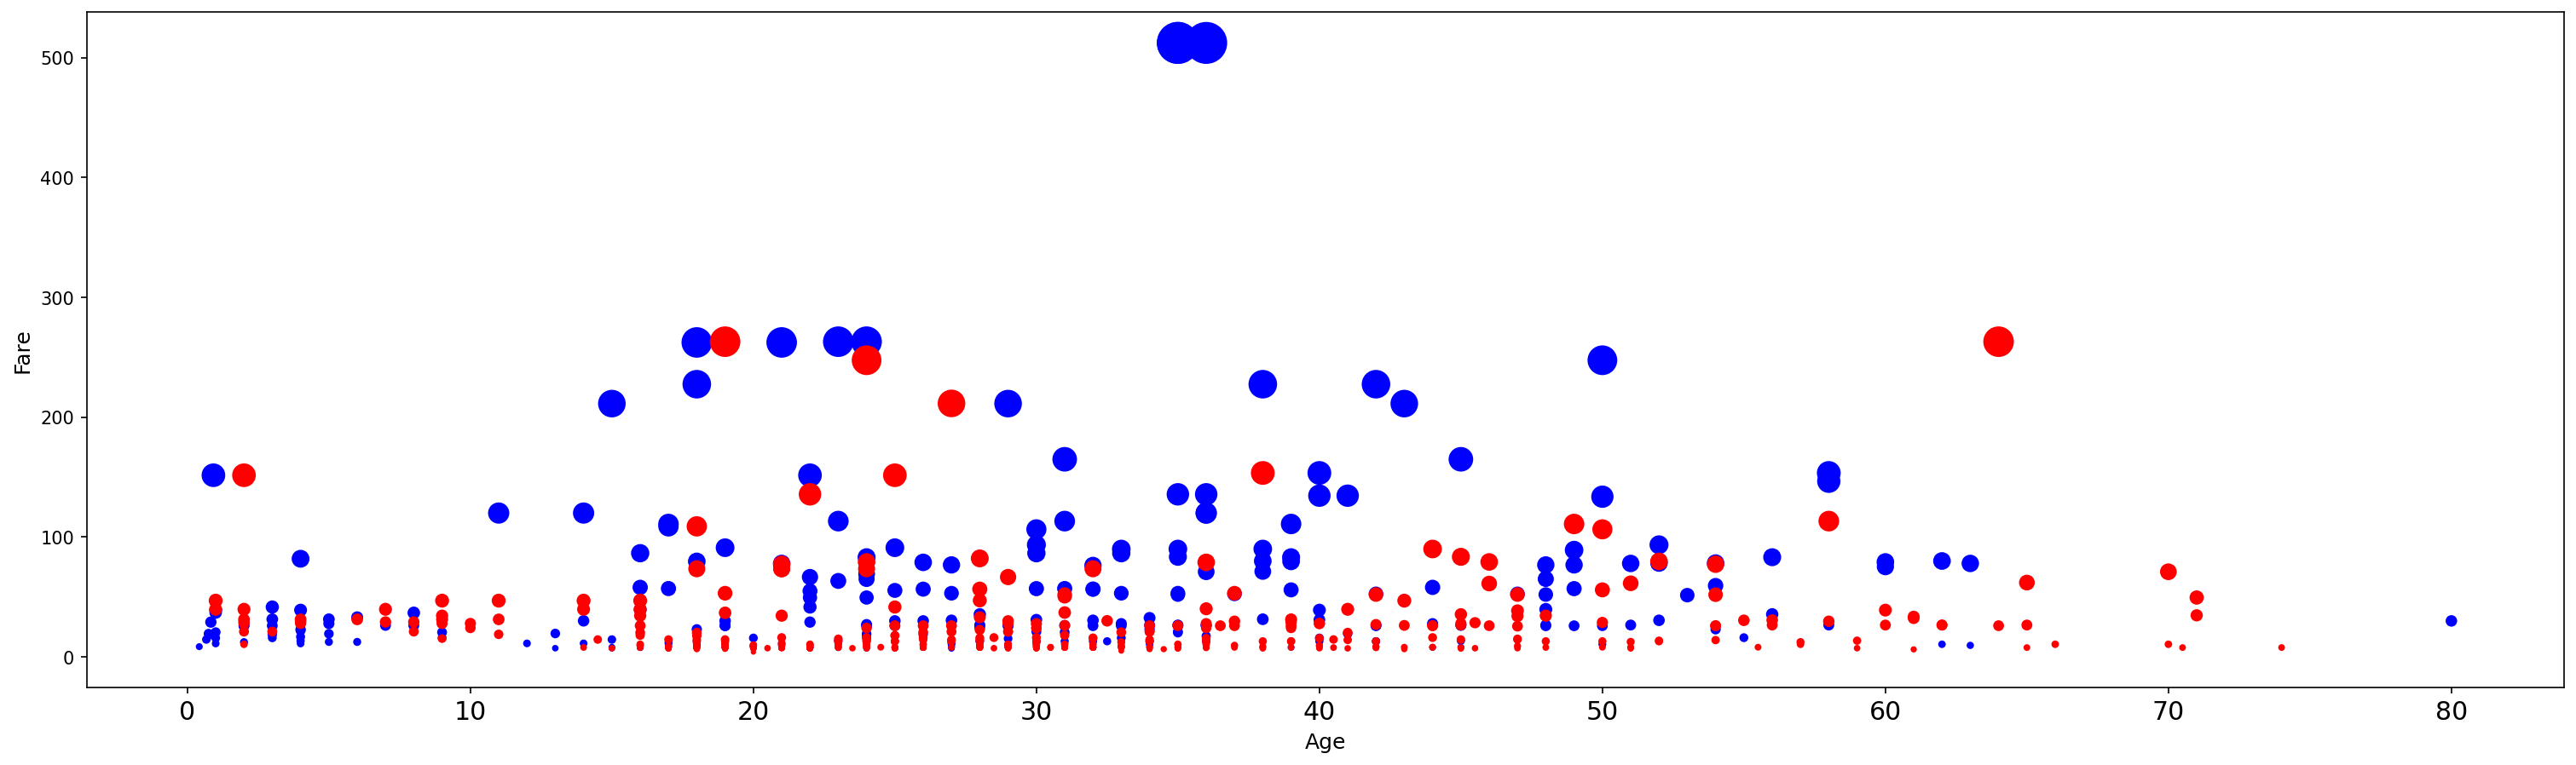

In [30]:
# 將票價、年齡、和生存結合在一張表上面
plt.figure(figsize=(25, 7))
ax = plt.subplot()
ax.scatter(
    data[data['Survived']==1]['Age'], 
    data[data['Survived']==1]['Fare'],
    c='b',
    s=data[data['Survived']==1]['Fare']
)

ax.scatter(
    data[data['Survived']==0]['Age'],
    data[data['Survived']==0]['Fare'],
    c='r',
    s=data[data['Survived']==0]['Fare']
)

plt.xlabel('Age')
plt.ylabel('Fare')

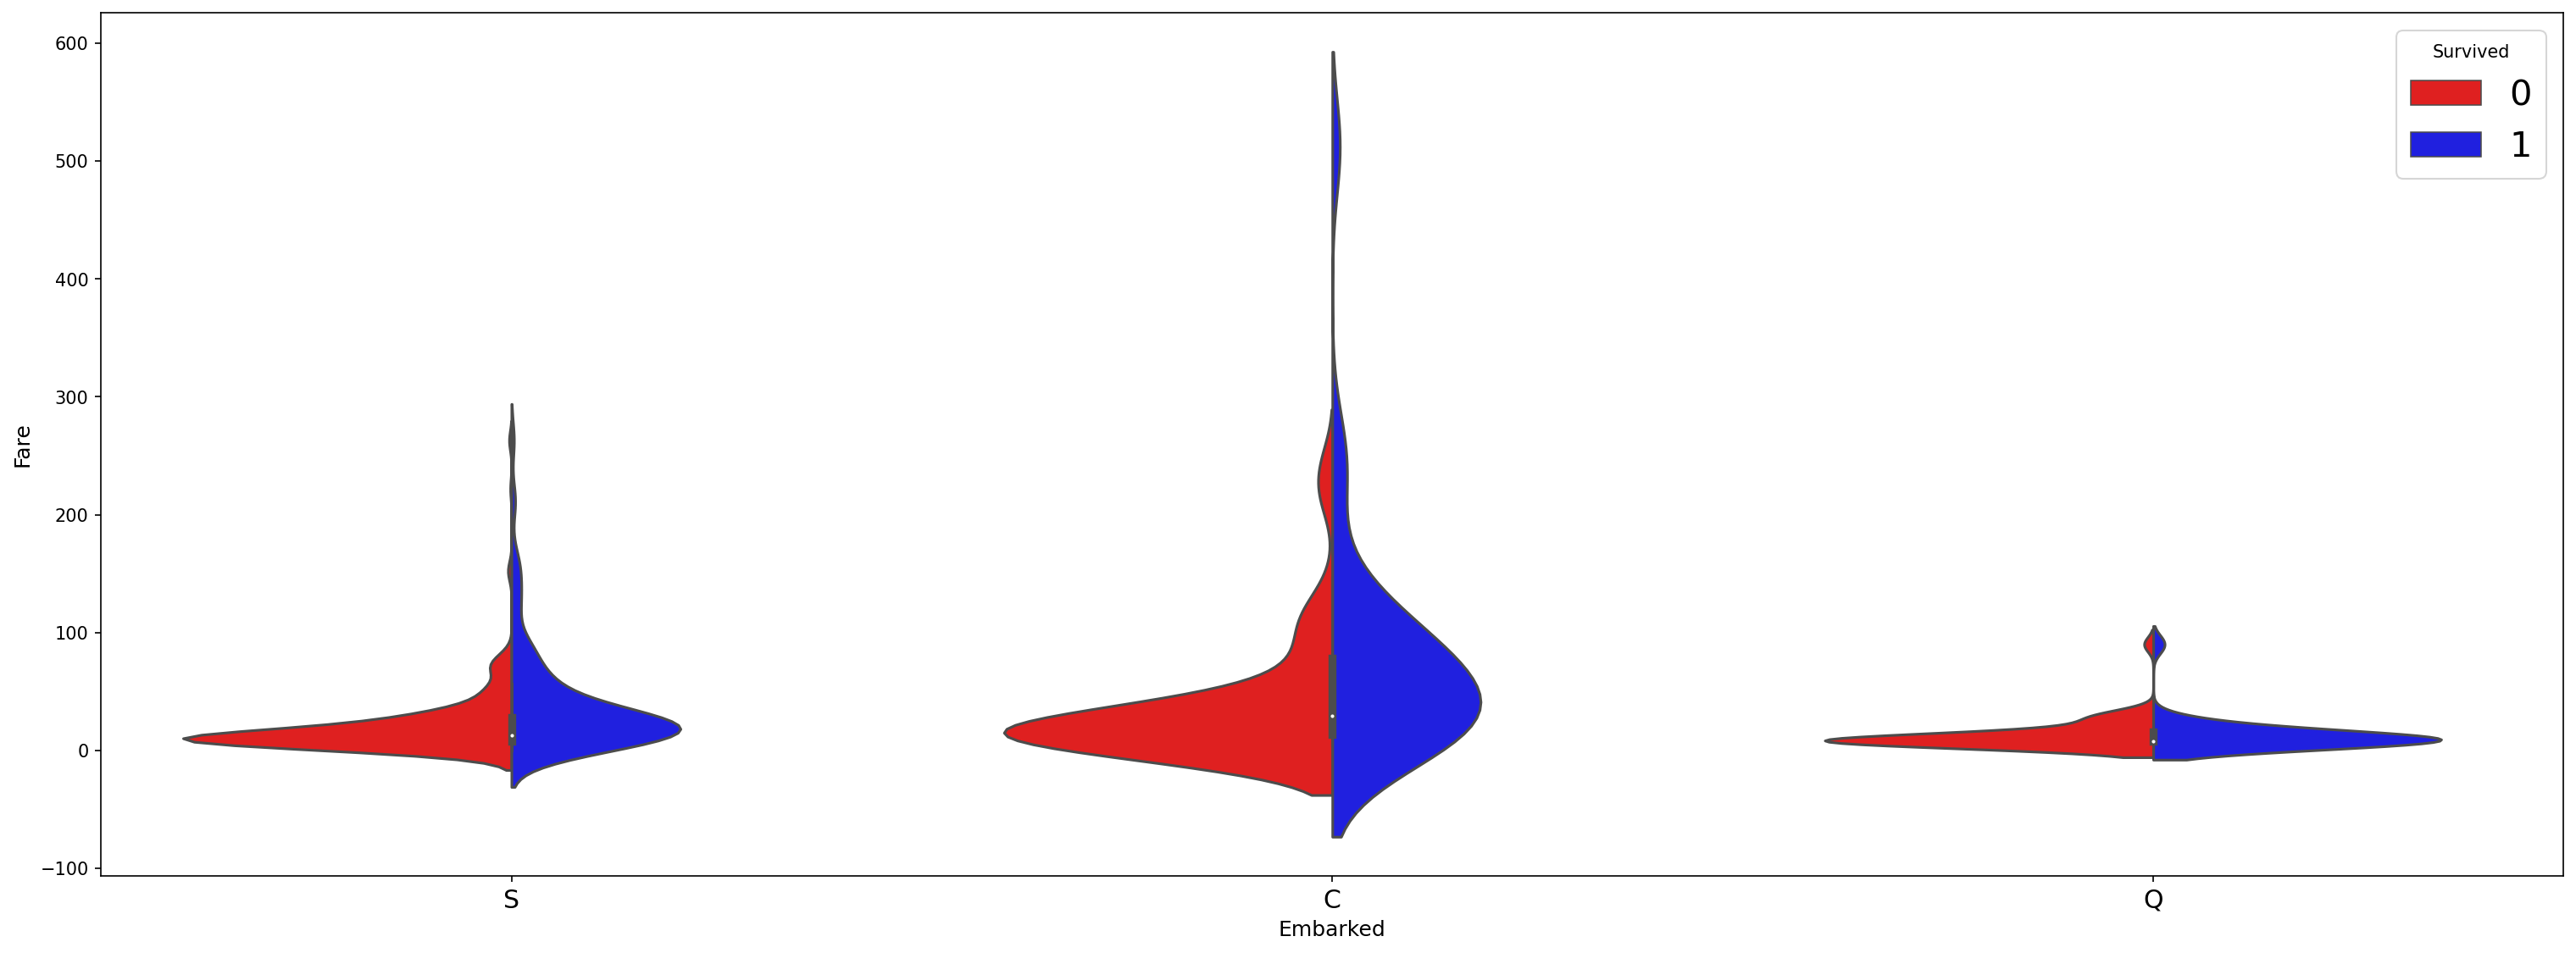

In [31]:
# 將票價、登船地點與生存數量做比較
fig = plt.figure(figsize=(25, 9))
sns.violinplot(
    x = 'Embarked', y='Fare',
    hue='Survived', data=data,
    split=True,
    palette={0: 'r', 1: 'b'}
)

In [32]:
# 特徵工程階段

In [35]:
# 列印進度
def  status(feature):
    print('Processing', feature, ': ok')

In [36]:
# 合併測試集與訓練集
def get_combined_data():
    train = pd.read_csv('./data/train.csv')
    test = pd.read_csv('./data/test.csv')

    targets = train.Survived
    train.drop(['Survived'], 1, inplace=True)

    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace=True, axis=1)
    return combined

In [37]:
get_combined_data()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [38]:
# 對Name做特徵處理

In [42]:
titles = set()
for n in data['Name']:
    titles.add(n.split(',')[1].split('.')[0].strip())

In [43]:
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [104]:
# 將相同意義的不同稱號統整成一種稱號
title_dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
combined = get_combined_data()

def merge_title():
    combined['Title'] = combined['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
    combined['Title'] = combined['Title'].map(title_dictionary)
merge_title()
status('Title')

Processing Title : ok


In [105]:
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


In [103]:
# 對Age做特徵處理

In [ ]:
# 補齊Age的缺值
# 以特徵的類別取中位數

In [113]:
# 檢視訓練集中的缺值
combined.iloc[:891]['Age'].isnull().sum()

177

In [114]:
# 檢視測試集中的缺值
combined.iloc[891:]['Age'].isnull().sum()

86

In [121]:
grouped_train = combined.iloc[:891].groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()
grouped_median_train

Age  SibSp  Parch       Fare
Sex    Pclass Title                                 
female 1      Miss     30.0    0.0    0.0   88.25000
              Mrs      40.0    1.0    0.0   79.20000
              Officer  49.0    0.0    0.0   25.92920
              Royalty  40.5    0.5    0.0   63.05000
       2      Miss     24.0    0.0    0.0   13.00000
              Mrs      31.5    1.0    0.0   26.00000
       3      Miss     18.0    0.0    0.0    8.75625
              Mrs      31.0    1.0    1.0   15.97500
male   1      Master    4.0    1.0    2.0  120.00000
              Mr       40.0    0.0    0.0   42.40000
              Officer  51.0    0.0    0.0   35.50000
              Royalty  40.0    0.0    0.0   27.72080
       2      Master    1.0    1.0    1.0   26.00000
              Mr       31.0    0.0    0.0   13.00000
              Officer  46.5    0.0    0.0   13.00000
       3      Master    4.0    3.5    1.0   28.51250
              Mr       26.0    0.0    0.0    7.89580

In [122]:
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
grouped_median_train

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0
5,female,2,Mrs,31.5
6,female,3,Miss,18.0
7,female,3,Mrs,31.0
8,male,1,Master,4.0
9,male,1,Mr,40.0


In [153]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    )
    return grouped_median_train[condition]['Age'].values[0]

def process_age(combined):
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    status('age')
    return combined
    
combined = process_age(combined)
combined[combined['Age'].isnull()]

Processing age : ok


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [154]:
# Name 的特徵處理
# 將Title轉換成one hot coding 並取代掉Name